In [12]:
import numpy as np

def q_learning(num_episodes, gamma, epsilon):
    # 定义火星机器人的环境
    n_states = 6
    n_actions = 2
    rewards = np.zeros(n_states)
    rewards[0] = 100
    rewards[5] = 40

    # 初始化 Q 表
    q_table = np.zeros((n_states, n_actions))

    q_table[0, :] = [100, 100]  # 起点状态
    q_table[5, :] = [40, 40]  # 终点状态
    # 进行 num_episodes 次训练
    for i in range(num_episodes):
        # 初始化机器人的位置
        #机器人的位置不一样，每次的结果都不一样。。
        #state = np.random.randint(1, 4)
        state = 1
        #state = 4
        #state = i % (n_states - 2) + 1
        # 进行一次迭代
        while True:
            # 选择动作
            if np.random.uniform() < epsilon:
                action = np.random.randint(n_actions)
            else:
                action = np.argmax(q_table[state])

            # 执行动作并观察下一个状态和奖励
            if action == 0:
                next_state = max(state - 1, 0)
            else:
                next_state = min(state + 1, n_states-1)
           # 只在到达终点状态时给予奖励
            if next_state == n_states - 1:
                reward = rewards[next_state]
            else:
                reward = 0
    
            # 更新 Q 表
            q_table[state, action] += (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            # 更新状态
            state = next_state

            # 如果到达终点，结束迭代
            if state == 0 or state == n_states-1:
                break
        # 输出每次迭代的 Q 表
            print(f"Q-Table after episode {i+1}")
            print(q_table)
        # 打印在当前状态下，往左走和往右走奖励更多的动作
    for i in range(n_states):
        print(f"State {i}: {'Left' if q_table[i][0] > q_table[i][1] else 'Right'}")

    # 返回训练好的 Q 表
    return q_table

In [6]:
num_episodes = 10000  # 进行 5000 次训练
gamma = 0.5  # 折扣因子为 0.9
epsilon = 0.2  # 初始探索率为 0.1

In [7]:
import matplotlib.pyplot as plt

def plot_q_table(q_table):
    fig, ax = plt.subplots()
    im = ax.imshow(q_table)

    # 添加 colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # 显示 x 和 y 轴标签
    ax.set_xticks(np.arange(q_table.shape[1]))
    ax.set_yticks(np.arange(q_table.shape[0]))
    ax.set_xticklabels(['left', 'right'])
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6'])
    ax.set_xlabel('Action')
    ax.set_ylabel('State')

    # 循环遍历数据集，向每个单元格添加文本标签
    for i in range(q_table.shape[0]):
        for j in range(q_table.shape[1]):
            text = ax.text(j, i, '{:.2f}'.format(q_table[i, j]),
                           ha='center', va='center', color='black')

    ax.set_title('Q Table')
    fig.tight_layout()
    plt.show()

In [13]:
q_table = q_learning(num_episodes, gamma, epsilon)

Q-Table after episode 1
[[100. 100.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 1
[[100. 100.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 1
[[100. 100.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 1
[[100. 100.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 1
[[100. 100.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 2
[[100. 100.]
 [ 50.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 2
[[100. 100.]
 [ 50.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 2
[[100. 100.]
 [ 50.   0.]
 [ 25.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 3
[[100. 100.]
 [ 50.   0.]
 [ 25.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 40.  40.]]
Q-Table after episode 3
[[100.  100. ]
 [ 50.    0. ]
 [ 25.    0. ]
 [ 1

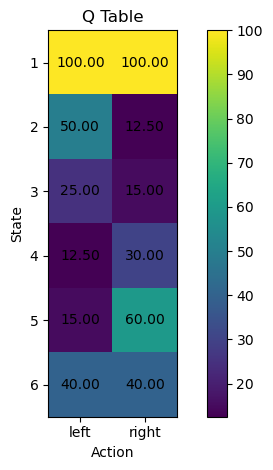

In [14]:
plot_q_table(q_table)